In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('BlackFriday/train.csv')
test = pd.read_csv('BlackFriday/test.csv')

## General outline for Feature Engineering

In [3]:
train.shape

(550068, 12)

In [4]:
test.shape

(233599, 11)

In [5]:
test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [6]:
def info_data(data):
    print("shape of the data is :",data.shape)
    print("="*10)
    print("first 5 elements of data :",data.head)
    print('='*10)
    print("Describtion of data :",data.describe())

In [7]:
info_data(test)

shape of the data is : (233599, 11)
first 5 elements of data : <bound method NDFrame.head of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000004  P00128942      M  46-50           7             B   
1       1000009  P00113442      M  26-35          17             C   
2       1000010  P00288442      F  36-45           1             B   
3       1000010  P00145342      F  36-45           1             B   
4       1000011  P00053842      F  26-35           1             C   
...         ...        ...    ...    ...         ...           ...   
233594  1006036  P00118942      F  26-35          15             B   
233595  1006036  P00254642      F  26-35          15             B   
233596  1006036  P00031842      F  26-35          15             B   
233597  1006037  P00124742      F  46-50           1             C   
233598  1006039  P00316642      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Categor

In [8]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [9]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
train.describe() 

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
train.describe(include='O') #obejct type

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [14]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [15]:
train.duplicated().sum() # to check duplicates
# train.drop_duplicates(inplace= True)

0

In [16]:
train.head() # here user id is mesleading info we drop it

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [17]:
train['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [18]:
train.drop(['User_ID'],axis=1,inplace=True)

In [19]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


assignments :
1. check outlayers
2. write a function to impute missing values --- (data,which method)
3. write a function for categorical encoding


In [20]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [21]:
train['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
train.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [23]:
# fixing the categorical feature - gender

train['Gender'] = train['Gender'].map({'F':0,'M':1})

# pd.get_dummies(train['Gender'],drop_first=True) another method

In [24]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [25]:
# pd.get_dummies(train['Gender'],drop_first=True)

In [26]:
# fix the categorical feature - AGE

train['Age'].unique() #nunique is used to get len

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [27]:
train['Age'].value_counts(sort=False)

0-17      15102
55+       21504
26-35    219587
46-50     45701
51-55     38501
36-45    110013
18-25     99660
Name: Age, dtype: int64

In [28]:
pd.get_dummies(train['Age'])

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
550063,0,0,0,0,0,1,0
550064,0,0,1,0,0,0,0
550065,0,0,1,0,0,0,0
550066,0,0,0,0,0,0,1


In [29]:
pd.get_dummies(train['Age'],drop_first=True)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
550063,0,0,0,0,1,0
550064,0,1,0,0,0,0
550065,0,1,0,0,0,0
550066,0,0,0,0,0,1


In [30]:
# above method manual nxt automation label encoding

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(train['Age'])
train['Age'] = label_encoder.fit_transform(train['Age'])

In [31]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [32]:
# fix the categorical feature - City_category
train.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [33]:
df_city = pd.get_dummies(train['City_Category'],drop_first=True)

In [34]:
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [35]:
                   #major #newcolumn axis
train = pd.concat([train,df_city],axis=1)

In [36]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,0,1


In [37]:
train.drop('City_Category',axis=1,inplace=True)

In [38]:
# now we replace city categpry with b and c columns with 0 and 1s
train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969,0,1


In [39]:
# fix the categorical feature - Stay_in_Current_city_years
train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [40]:
#                                  replacing + with empty
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].str.replace("+","")

C:\Users\User\AppData\Local\Temp/ipykernel_9484/2976240252.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].str.replace("+","")


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int32(1), int64(5), object(2), uint8(2)
memory usage: 40.

In [42]:
# convert dtype
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].astype(int)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int32(2), int64(5), object(1), uint8(2)
memory usage: 38.

In [44]:
train['B'] = train['B'].astype(int)
train['C'] = train['C'].astype(int)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int32  
 11  C                           550068 non-null  int32  
dtypes: float64(2), int32(4), int64(5), object(1)
memory usage: 42.0+ MB


In [46]:
def fill_missing_values(data,fill_value,fill_types,columns,dataframe_name):


    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())

    for column in columns:

        if "Random_sample_Fill" in fill_types:
            data[column+"_random"]=data[column]
            ##It will have the random sample to fill the na
            random_sample = data[column].dropna().sample(data[column].isnull().sum(),random_state=0)
            ##pandas need to have same index in order to merge the dataset
            random_sample.index=data[data[column].isnull()].index
            data.loc[data[column].isnull(),column+'_random']=random_sample
            data[column]=data[column+"_random"]
            data.drop([column+"_random"],axis=1,inplace=True)

        if "New_Feature_Importance" in fill_types :
            data[column+'_NAN'] = np.where(data[column].isnull(),1,0)
            data[column].fillna(data[column].median(),inplace=True)

        # Fill missing values with median values: --- > For Numeric features
        if "Median_Fill" in fill_types :
            data[column].fillna(data[column].median(),inplace=True)

        # Fill missing values with Mode values: --- > For Categorical features
        if "Mode_Fill" in fill_types :
            data[column].fillna(data[column].mode()[0],inplace=True)

        # Fill missing values with Specific values: --- > For Numeric/Categorical features
        if "Value_Fill" in fill_types :
            data[column].fillna(fill_value,inplace=True)
        # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) : --- > For Numeric/Categorical features
        if "Forward_Fill" in fill_types :
            data[column].ffill(axis = 0, inplace=True)

        # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) : --- > For Numeric/Categorical features
        if "Backward_Fill" in fill_types :
            data[ column ] = data[ column ].bfill(axis = 0)

    print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())

        
    return data

In [47]:
fill_missing_values(train,fill_value=0,fill_types=["Mode_Fill"],columns=['Product_Category_2','Product_Category_3'],dataframe_name="Train")

Missing Values BEFORE REMOVAL in  Train  data


Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

Missing Values AFTER REMOVAL in  Train  data


Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5,13,1,1,20,8.0,16.0,368,1,0
550064,P00375436,0,2,1,3,0,20,8.0,16.0,371,0,1
550065,P00375436,0,2,15,4,1,20,8.0,16.0,137,1,0
550066,P00375436,0,6,1,2,0,20,8.0,16.0,365,0,1


In [48]:
train.drop('Product_ID',axis=1,inplace=True)

In [49]:
#start visualization

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

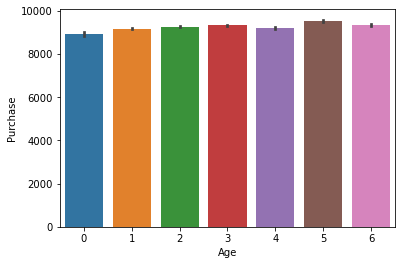

In [50]:
sns.barplot('Age','Purchase',data=train)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

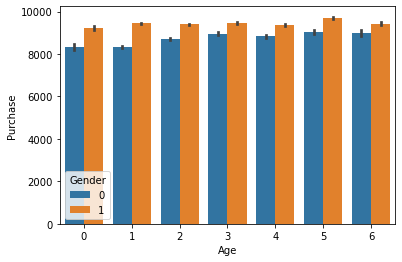

In [51]:
sns.barplot('Age','Purchase',hue='Gender',data=train) #with respect to gender

# assignment
1.Occupation vs Purchase --- withrespect to gender
2.Product_category_1 vs Purchase -- withrespect to gender
3.Product Category_2 vs Purchase -- withrespect to gender
4.Product Category_3 vs Purchase -- withrespect to gender


In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
newtrain = sc.fit_transform(train)

In [53]:
pd.DataFrame(newtrain)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.746513,-1.844248,0.294864,0.109801,-0.833018,-0.610809,-0.293605,0.368792,-0.177973,-0.851422,-0.672143
1,-1.746513,-1.844248,0.294864,0.109801,-0.833018,-1.118912,-0.759362,-0.361176,1.181756,-0.851422,-0.672143
2,-1.746513,-1.844248,0.294864,0.109801,-0.833018,1.675656,-0.293605,0.368792,-1.561193,-0.851422,-0.672143
3,-1.746513,-1.844248,0.294864,0.109801,-0.833018,1.675656,1.103664,0.368792,-1.633858,-0.851422,-0.672143
4,0.572570,2.588277,1.214734,1.660861,-0.833018,0.659449,-0.293605,0.368792,-0.257805,-0.851422,1.487778
...,...,...,...,...,...,...,...,...,...,...,...
550063,0.572570,1.849523,0.754799,-0.665728,1.200454,3.708069,-0.293605,0.368792,-1.771025,1.174506,-0.672143
550064,-1.746513,-0.366739,-1.084943,0.885331,-0.833018,3.708069,-0.293605,0.368792,-1.770428,-0.851422,1.487778
550065,-1.746513,-0.366739,1.061423,1.660861,1.200454,3.708069,-0.293605,0.368792,-1.817013,1.174506,-0.672143
550066,-1.746513,2.588277,-1.084943,0.109801,-0.833018,3.708069,-0.293605,0.368792,-1.771623,-0.851422,1.487778


# assignment
1.Occupation vs Purchase --- withrespect to gender
2.Product_category_1 vs Purchase -- withrespect to gender
3.Product Category_2 vs Purchase -- withrespect to gender
4.Product Category_3 vs Purchase -- withrespect to gender


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

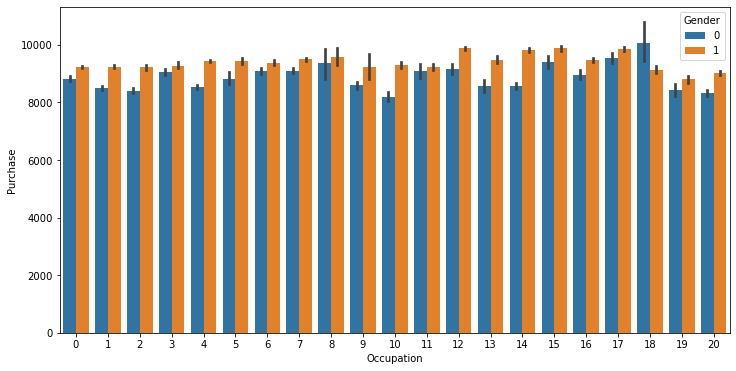

In [69]:
plt.figure(figsize=[12,6])
sns.barplot('Occupation','Purchase',hue='Gender',data=train)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

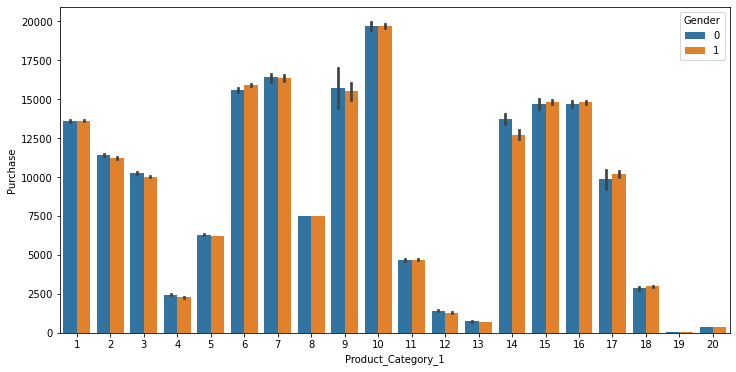

In [64]:
plt.figure(figsize=[12,6])
sns.barplot('Product_Category_1','Purchase',hue='Gender',data = train)


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

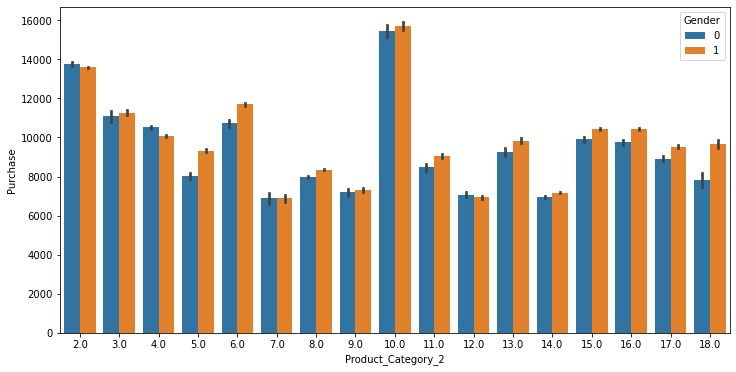

In [67]:
plt.figure(figsize=[12,6])
sns.barplot('Product_Category_2','Purchase',hue='Gender',data = train)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

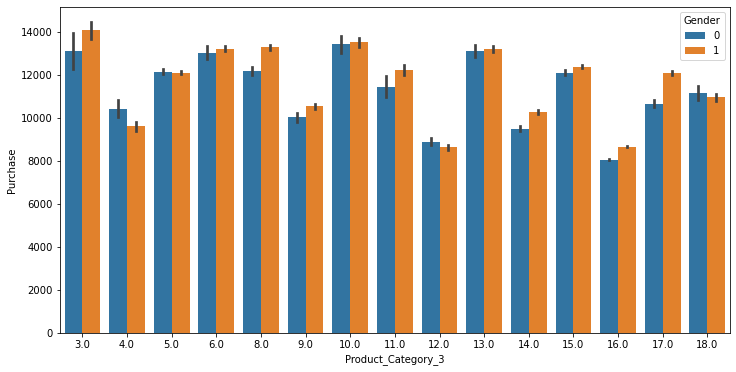

In [68]:
plt.figure(figsize=[12,6])
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=train)